In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from hashlib import sha1
from IPython.display import display,Image,display_jpeg
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from sklearn import metrics
%matplotlib inline

In [2]:
train_folders = os.listdir('notMNIST_large/')
train_folders = [('notMNIST_large/'+i) for i in train_folders]
test_folders = os.listdir('notMNIST_small/')
test_folders = [('notMNIST_small/'+i) for i in test_folders]

In [3]:
train_folders.sort()
train_folders

['notMNIST_large/A',
 'notMNIST_large/B',
 'notMNIST_large/C',
 'notMNIST_large/D',
 'notMNIST_large/E',
 'notMNIST_large/F',
 'notMNIST_large/G',
 'notMNIST_large/H',
 'notMNIST_large/I',
 'notMNIST_large/J']

In [4]:
test_folders.sort()
test_folders

['notMNIST_small/A',
 'notMNIST_small/B',
 'notMNIST_small/C',
 'notMNIST_small/D',
 'notMNIST_small/E',
 'notMNIST_small/F',
 'notMNIST_small/G',
 'notMNIST_small/H',
 'notMNIST_small/I',
 'notMNIST_small/J']

In [5]:
def display_sample_images(data_folders):
  for folder in data_folders:
    # Display sample image
    sample_file = [os.path.join(folder, f) for f in os.listdir(data_folders[0])][0]
    print 'sample folder ', folder
    print 'sample image to display ', sample_file
    display(Image(filename=sample_file))

display_sample_images(train_folders)
display_sample_images(test_folders)

sample folder  notMNIST_large/A
sample image to display  notMNIST_large/A/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/B
sample image to display  notMNIST_large/B/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/C
sample image to display  notMNIST_large/C/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/D
sample image to display  notMNIST_large/D/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/E
sample image to display  notMNIST_large/E/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/F
sample image to display  notMNIST_large/F/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/G
sample image to display  notMNIST_large/G/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/H
sample image to display  notMNIST_large/H/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/I
sample image to display  notMNIST_large/I/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/J
sample image to display  notMNIST_large/J/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_small/A
sample image to display  notMNIST_small/A/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/B
sample image to display  notMNIST_small/B/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/C
sample image to display  notMNIST_small/C/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/D
sample image to display  notMNIST_small/D/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/E
sample image to display  notMNIST_small/E/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/F
sample image to display  notMNIST_small/F/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/G
sample image to display  notMNIST_small/G/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/H
sample image to display  notMNIST_small/H/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/I
sample image to display  notMNIST_small/I/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/J
sample image to display  notMNIST_small/J/RGlnaXRhbGZhY2Uub3Rm.png


In [6]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load(data_folders, min_num_images, max_num_images):
  dataset = np.ndarray(
    shape=(max_num_images, image_size, image_size), dtype=np.float32)
  labels = np.ndarray(shape=(max_num_images), dtype=np.int32)
  label_index = 0
  image_index = 0
  for folder in data_folders:
    # Display sample image
    sample_file = [os.path.join(folder, f) for f in os.listdir(data_folders[0])][0]
    print 'sample folder ', folder
    print 'sample image to display ', sample_file
    display(Image(filename=sample_file))
   
    for image in os.listdir(folder):
      if image_index >= max_num_images:
        raise Exception('More images than expected: %d >= %d' % (
          image_index, max_num_images))
      image_file = os.path.join(folder, image)
      try:
        image_data = (ndimage.imread(image_file).astype(float) -
                      pixel_depth / 2) / pixel_depth
        if image_data.shape != (image_size, image_size):
          raise Exception('Unexpected image shape: %s' % str(image_data.shape))
        dataset[image_index, :, :] = image_data
        labels[image_index] = label_index
        image_index += 1
      except IOError as e:
        print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    label_index += 1
  num_images = image_index
  dataset = dataset[0:num_images, :, :]
  labels = labels[0:num_images]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' % (
        num_images, min_num_images))
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  print('Labels:', labels.shape)
  return dataset, labels
train_dataset, train_labels = load(train_folders, 450000, 550000)
test_dataset, test_labels = load(test_folders, 18000, 20000)

sample folder  notMNIST_large/A
sample image to display  notMNIST_large/A/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


('Could not read:', 'notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png', ':', IOError("cannot identify image file 'notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png'",), "- it's ok, skipping.")
('Could not read:', 'notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png', ':', IOError("cannot identify image file 'notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png'",), "- it's ok, skipping.")
('Could not read:', 'notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png', ':', IOError("cannot identify image file 'notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png'",), "- it's ok, skipping.")
sample folder  notMNIST_large/B
sample image to display  notMNIST_large/B/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


('Could not read:', 'notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png', ':', IOError("cannot identify image file 'notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png'",), "- it's ok, skipping.")
sample folder  notMNIST_large/C
sample image to display  notMNIST_large/C/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/D
sample image to display  notMNIST_large/D/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


('Could not read:', 'notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png', ':', IOError("cannot identify image file 'notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png'",), "- it's ok, skipping.")
sample folder  notMNIST_large/E
sample image to display  notMNIST_large/E/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/F
sample image to display  notMNIST_large/F/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/G
sample image to display  notMNIST_large/G/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/H
sample image to display  notMNIST_large/H/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/I
sample image to display  notMNIST_large/I/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


sample folder  notMNIST_large/J
sample image to display  notMNIST_large/J/T2ZmaWNpbmFTZXJpZkNUVCBCb2xkLnR0Zg==.png


('Full dataset tensor:', (529114, 28, 28))
('Mean:', -0.081659392)
('Standard deviation:', 0.45423403)
('Labels:', (529114,))
sample folder  notMNIST_small/A
sample image to display  notMNIST_small/A/RGlnaXRhbGZhY2Uub3Rm.png


('Could not read:', 'notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png', ':', IOError("cannot identify image file 'notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png'",), "- it's ok, skipping.")
sample folder  notMNIST_small/B
sample image to display  notMNIST_small/B/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/C
sample image to display  notMNIST_small/C/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/D
sample image to display  notMNIST_small/D/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/E
sample image to display  notMNIST_small/E/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/F
sample image to display  notMNIST_small/F/RGlnaXRhbGZhY2Uub3Rm.png


('Could not read:', 'notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png', ':', IOError("cannot identify image file 'notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png'",), "- it's ok, skipping.")
sample folder  notMNIST_small/G
sample image to display  notMNIST_small/G/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/H
sample image to display  notMNIST_small/H/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/I
sample image to display  notMNIST_small/I/RGlnaXRhbGZhY2Uub3Rm.png


sample folder  notMNIST_small/J
sample image to display  notMNIST_small/J/RGlnaXRhbGZhY2Uub3Rm.png


('Full dataset tensor:', (18724, 28, 28))
('Mean:', -0.074636288)
('Standard deviation:', 0.45862222)
('Labels:', (18724,))


In [7]:
def display_sample_images_from_dataset(dataset, labels, sample_size):
  image_samples = np.random.randint(dataset.shape[0],size=sample_size)
  for image_index in image_samples:
    plt.figure()
    plt.suptitle('Label ' + 
                 `labels[image_index]` + ' : ' + 
                 chr(ord('a') + labels[image_index]) +  ' or ' + 
                 chr(ord('A') + labels[image_index]))
    plt.imshow(dataset[image_index])

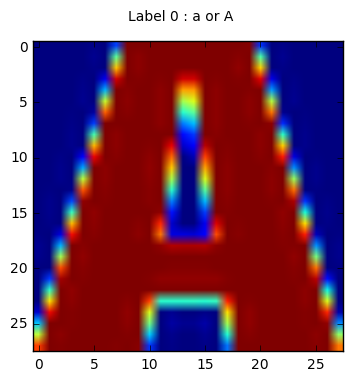

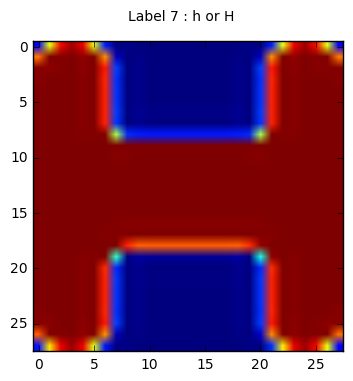

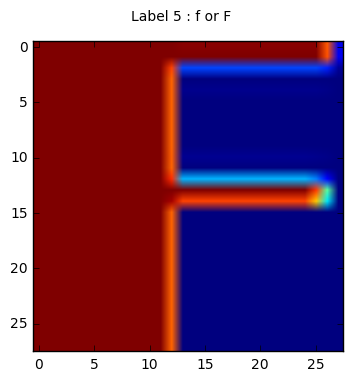

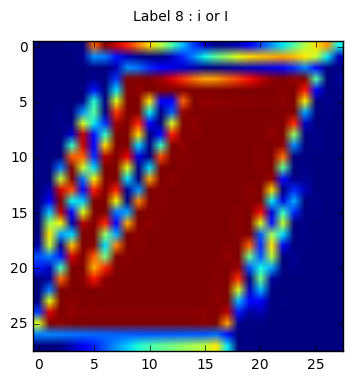

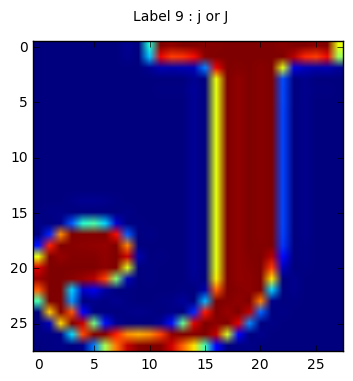

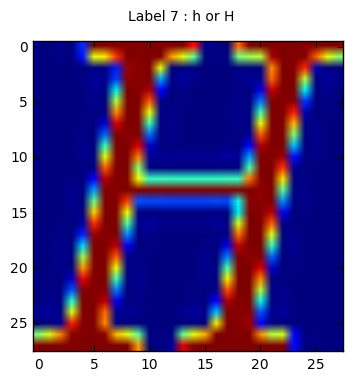

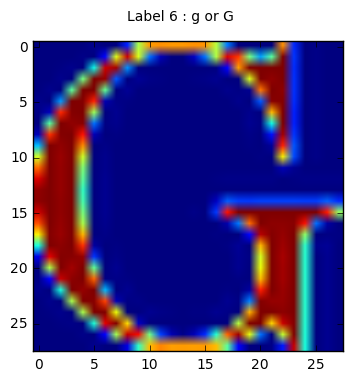

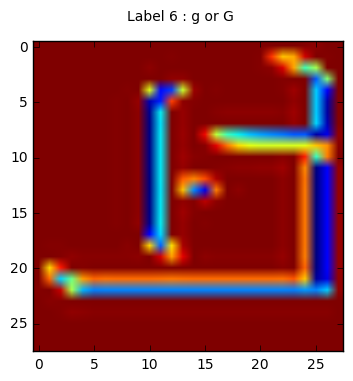

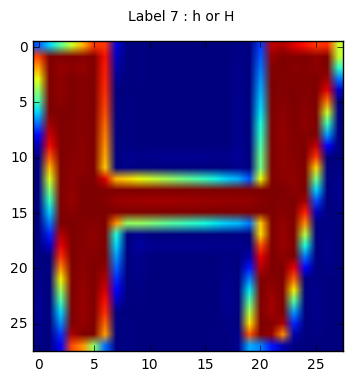

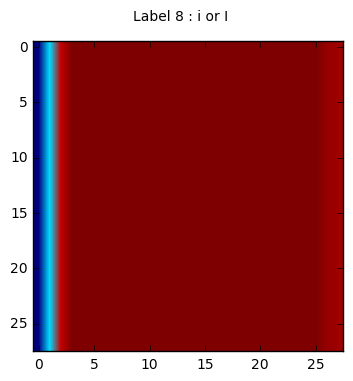

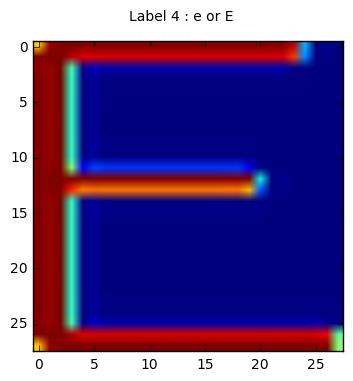

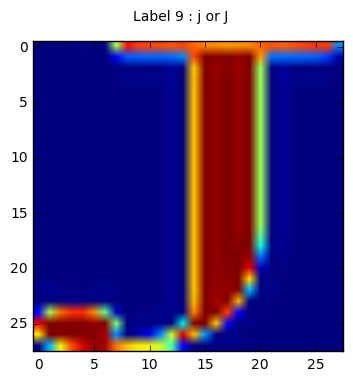

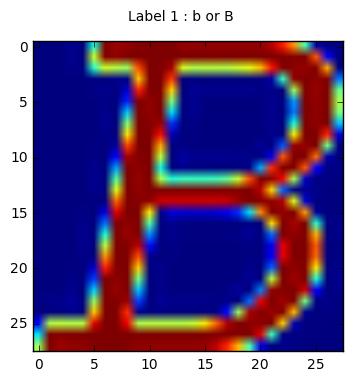

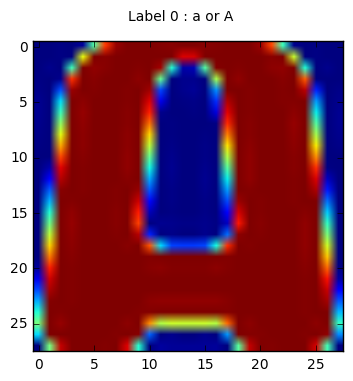

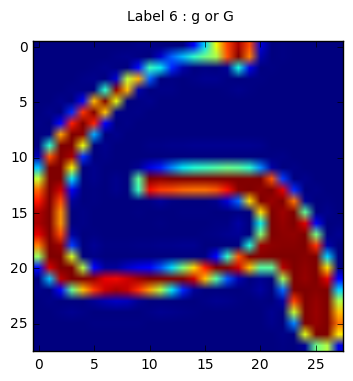

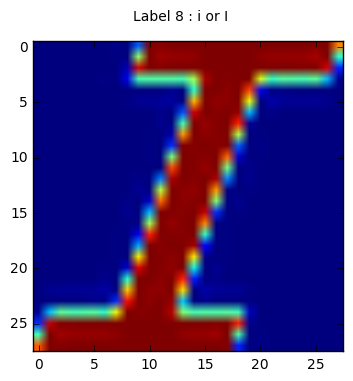

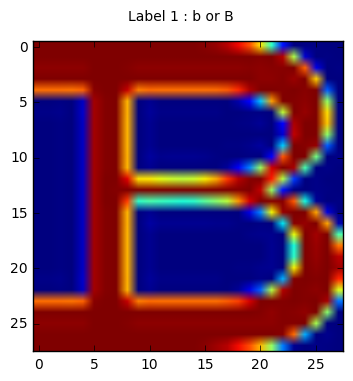

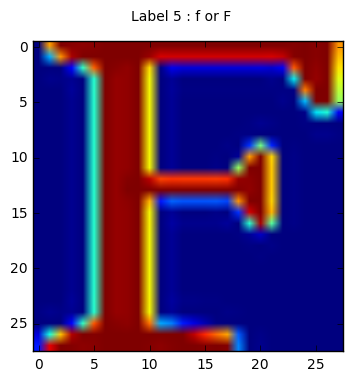

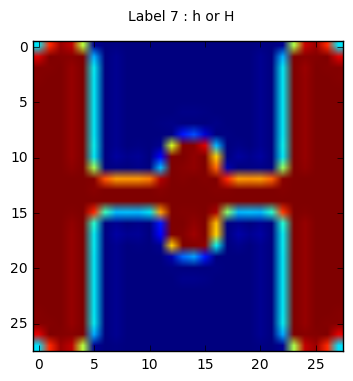

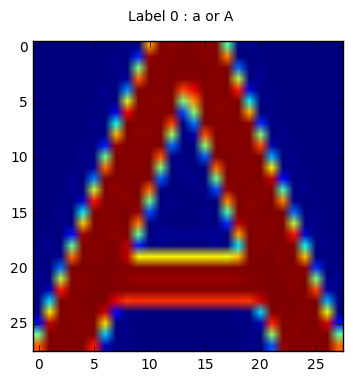

In [8]:
display_sample_images_from_dataset(train_dataset, train_labels, 10)

display_sample_images_from_dataset(test_dataset, test_labels, 10)

In [9]:
np.random.seed(133)
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)

In [10]:
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)

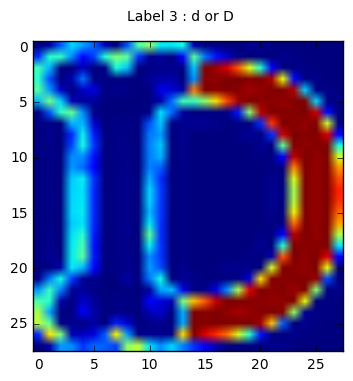

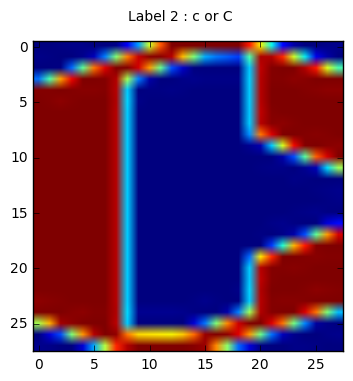

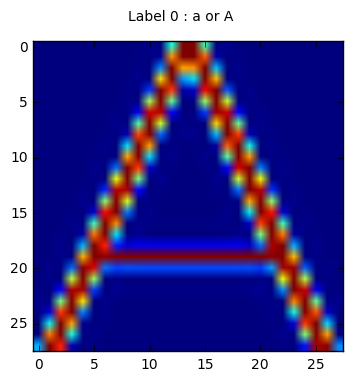

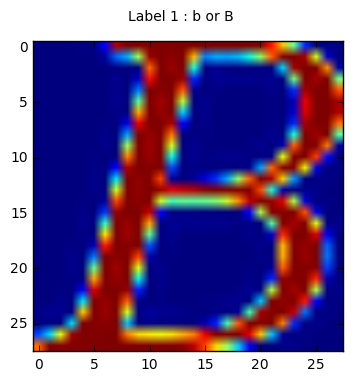

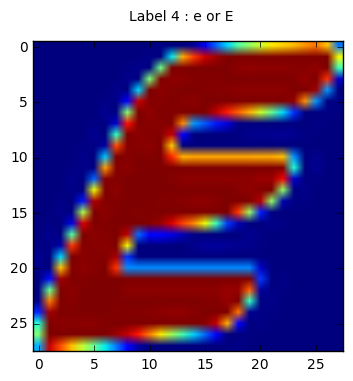

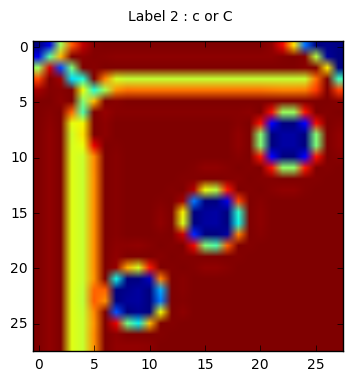

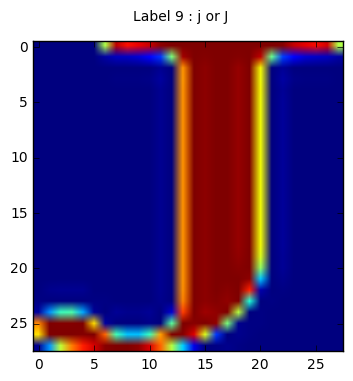

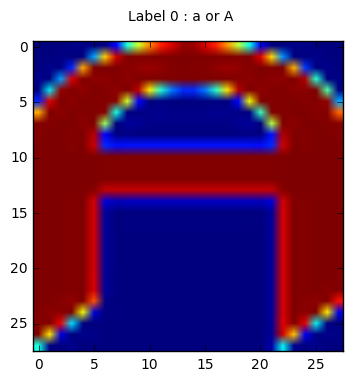

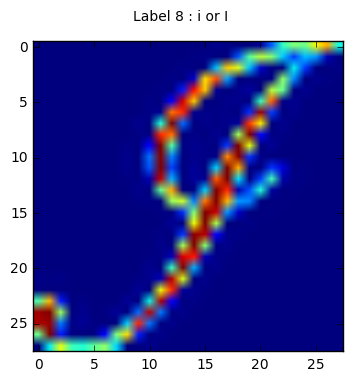

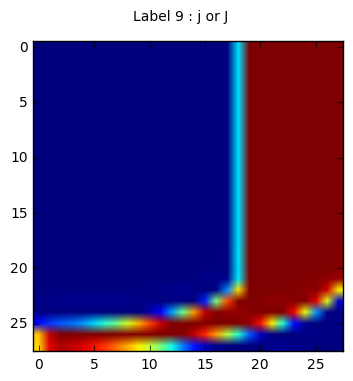

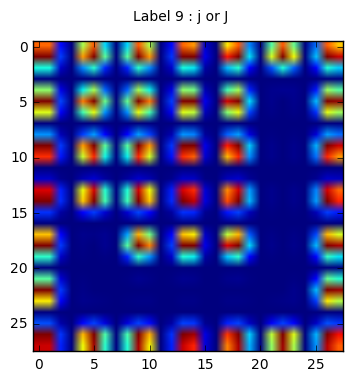

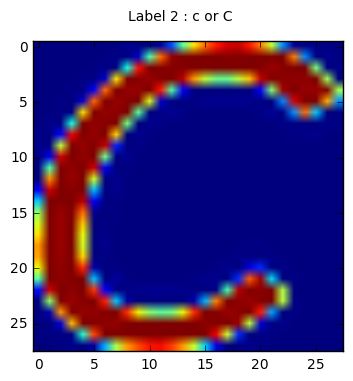

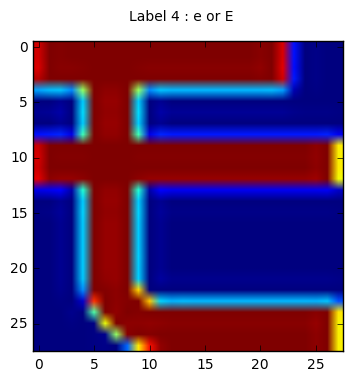

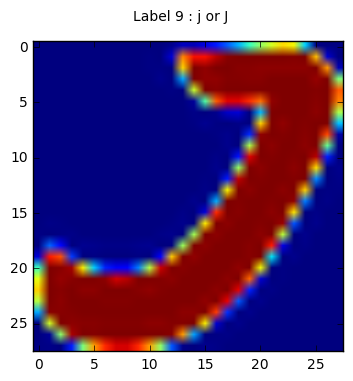

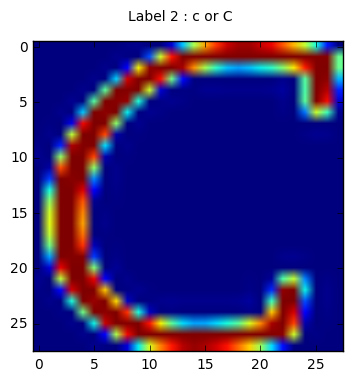

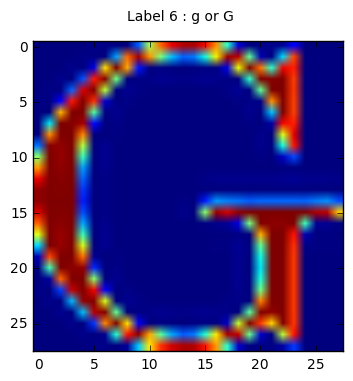

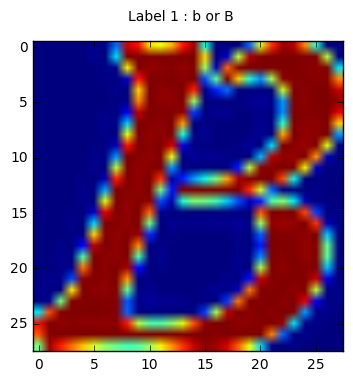

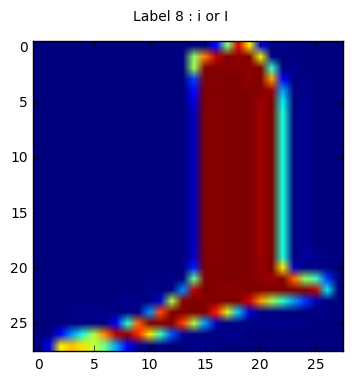

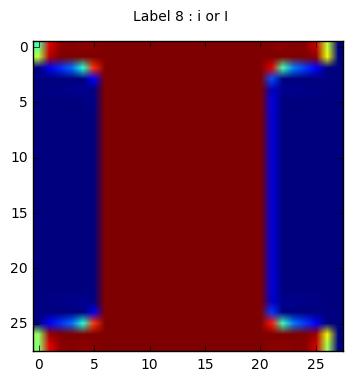

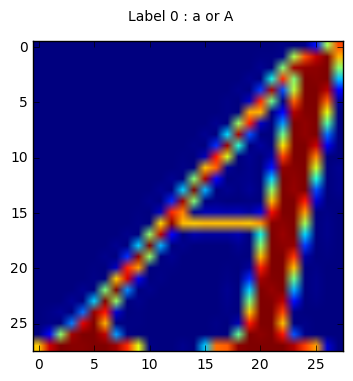

In [11]:
display_sample_images_from_dataset(train_dataset, train_labels, 10)

display_sample_images_from_dataset(test_dataset, test_labels, 10)

In [12]:
num_classes = 10
def get_class_distribution(dataset, labels):
  class_instances_count = np.zeros(num_classes)
  for image_index in range(0, dataset.shape[0] - 1):
    class_instances_count[labels[image_index]] += 1;
    
  return class_instances_count * 100 / class_instances_count.sum()
    
print 'Percentage of number of instances for each class label of total', num_classes, 'classes in test data set' 
class_distribution = get_class_distribution(train_dataset, train_labels)
print class_distribution;

Percentage of number of instances for each class label of total 10 classes in test data set
[  9.99956531   9.99975431  10.0001323    9.9999433   10.0001323
  10.0001323   10.0001323   10.0001323   10.0001323    9.9999433 ]


In [13]:
test_dataset.shape[0]

18724

In [14]:
print 'sd =', class_distribution.std()

sd = 0.000189938172396


In [15]:
train_size = 200000
valid_size = 10000

valid_dataset = train_dataset[:valid_size,:,:]
valid_labels = train_labels[:valid_size]
train_dataset = train_dataset[valid_size:valid_size+train_size,:,:]
train_labels = train_labels[valid_size:valid_size+train_size]

In [16]:
print('Training', train_dataset.shape, train_labels.shape)
print('Validation', valid_dataset.shape, valid_labels.shape)

('Training', (200000, 28, 28), (200000,))
('Validation', (10000, 28, 28), (10000,))


In [17]:
pickle_file = 'notMNIST.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [18]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

('Compressed pickle size:', 718193801)


In [19]:
def get_count_exact_overlaps(dataset1, dataset2):
  dataset1_hash = [
                   sha1(dataset1_instance).digest() 
                   for dataset1_instance in dataset1
                  ]
  dataset2_hash = [
                   sha1(dataset2_instance).digest() 
                   for dataset2_instance in dataset2
                  ]
  return np.intersect1d(dataset1_hash, dataset2_hash).size
    
print 'Count of exact overlaping instances between valid and train dataset : ' + `get_count_exact_overlaps(valid_dataset, train_dataset)`
print 'Count of exact overlaping instances between test and train dataset : ' + `get_count_exact_overlaps(test_dataset, train_dataset)`


Count of exact overlaping instances between valid and train dataset : 957
Count of exact overlaping instances between test and train dataset : 2114


In [20]:
def get_custom_hash(instance):
  difference = []
  for row in range(0, 28):
    for col in range(0, 27):
      difference.append(instance[col][row]  > instance[col + 1][row])
  return sha1(np.array(difference).astype(int))

def get_count_overlaps(dataset1, dataset2):
  dataset1_hash = [
                   get_custom_hash(dataset1_instance).digest() 
                   for dataset1_instance in dataset1
                  ]
  dataset2_hash = [
                   get_custom_hash(dataset2_instance).digest() 
                   for dataset2_instance in dataset2
                  ]
  return np.intersect1d(dataset1_hash, dataset2_hash).size
    
print 'Count of overlaping instances between valid and train dataset : ' + `get_count_overlaps(valid_dataset, train_dataset)`
print 'Count of overlaping instances between test and train dataset : ' + `get_count_overlaps(test_dataset, train_dataset)`

Count of overlaping instances between valid and train dataset : 1061
Count of overlaping instances between test and train dataset : 2284


In [21]:
def get_dataset_hash(dataset):
  return [
          sha1(dataset_instance).digest() 
          for dataset_instance in dataset
         ]

train_dataset_hash = get_dataset_hash(train_dataset)
valid_dataset_hash = get_dataset_hash(valid_dataset)
test_dataset_hash = get_dataset_hash(test_dataset)

duplicates_in_train_and_valid_dataset = np.intersect1d(train_dataset_hash, valid_dataset_hash)
duplicates_in_train_and_test_dataset = np.intersect1d(train_dataset_hash, test_dataset_hash)
duplicates_in_valid_and_test_dataset = np.intersect1d(test_dataset_hash, valid_dataset_hash)

duplicates = np.hstack(
                       (duplicates_in_train_and_valid_dataset,
                        duplicates_in_train_and_test_dataset,
                        duplicates_in_valid_and_test_dataset)
                      )

def get_sanitize(dataset, dataset_hash, exclude_hash):
  return np.array([
                   dataset[index] for index in 
                   np.arange(dataset.shape[0]) if
                   dataset_hash[index] not in 
                   exclude_hash
                 ])

sanitized_valid_dataset = get_sanitize(valid_dataset, valid_dataset_hash, duplicates)
sanitized_test_dataset = get_sanitize(test_dataset, test_dataset_hash, duplicates)

print 'original valid dataset shape',  valid_dataset.shape
print 'sanitized valid dataset shape', sanitized_valid_dataset.shape
print 'original test dataset shape',  test_dataset.shape
print 'sanitized test dataset shape', sanitized_test_dataset.shape

original valid dataset shape (10000, 28, 28)
sanitized valid dataset shape (8815, 28, 28)
original test dataset shape (18724, 28, 28)
sanitized test dataset shape (16192, 28, 28)


In [22]:
def get_classifier(dataset, labels, sample_size):
  train_n_dataset = dataset[:sample_size, :, :]
  train_n_labels = labels[:sample_size]
  # convert to 2d
  train_n_dataset = train_n_dataset.reshape(sample_size, image_size * image_size)
  model = LogisticRegression()
  model.fit(train_n_dataset, train_n_labels)
  
  return model

def run_test(classifier, test_name):
 print 'Test result of classifier, ', test_name
 test_dataset2d = test_dataset.reshape(test_dataset.shape[0], image_size * image_size)
 predicted = classifier.predict(test_dataset2d)
 print(metrics.classification_report(test_labels, predicted))
 print 'accuracy ', 100 * classifier.score(test_dataset2d, test_labels), '%'
    
clf50 = get_classifier(train_dataset, train_labels, 50)
run_test(clf50, 'classifier50')

clf100 = get_classifier(train_dataset, train_labels, 100)
run_test(clf100, 'classifier100')

clf1000 = get_classifier(train_dataset, train_labels, 1000)
run_test(clf1000, 'classifier1000')

clf5000 = get_classifier(train_dataset, train_labels, 5000)
run_test(clf5000, 'classifier5000')

clf_all = get_classifier(train_dataset, train_labels, train_dataset.shape[0])
run_test(clf_all, 'classifier_all')

Test result of classifier,  classifier50
             precision    recall  f1-score   support

          0       0.80      0.47      0.60      1872
          1       0.65      0.38      0.48      1873
          2       0.76      0.86      0.80      1873
          3       0.85      0.77      0.81      1873
          4       0.55      0.68      0.61      1873
          5       0.77      0.84      0.80      1872
          6       0.85      0.67      0.75      1872
          7       0.75      0.72      0.73      1872
          8       0.64      0.68      0.66      1872
          9       0.52      0.86      0.65      1872

avg / total       0.71      0.69      0.69     18724

accuracy  69.3227942747 %
Test result of classifier,  classifier100
             precision    recall  f1-score   support

          0       0.81      0.80      0.80      1872
          1       0.85      0.69      0.76      1873
          2       0.77      0.73      0.75      1873
          3       0.87      0.84      0

In [25]:
test_labels.shape[0]

18724

In [27]:
train_labels.shape[0]

200000

In [51]:
test = ['test/Untitled Folder/']

In [52]:
test

['test/Untitled Folder/']

In [65]:
def display_test_images(data_folder):    
    print 'Displaying hand written test cases:\n\n'
    for i in os.listdir(data_folder):
        print data_folder+i
        img = Image(filename=(data_folder + i))
        display_jpeg(img)

Displaying hand written test cases:


test/Untitled Folder/18870615_1346537052104881_447451716_o.jpg


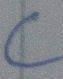

test/Untitled Folder/a7.jpg


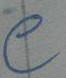

test/Untitled Folder/a5.jpg


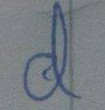

test/Untitled Folder/a6.jpg


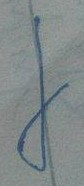

test/Untitled Folder/a.jpg


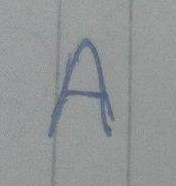

test/Untitled Folder/a4.jpg


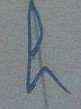

test/Untitled Folder/a2.jpg


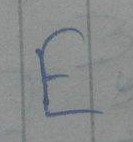

test/Untitled Folder/a1.jpg


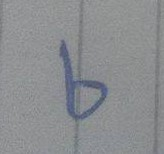

test/Untitled Folder/a3.jpg


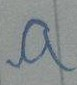

In [66]:
display_test_images('test/Untitled Folder/')

In [75]:
test_folders = 'test/Untitled Folder'

In [76]:
load_test_dataset = np.ndarray(shape=(9,28,28),dtype=np.float32)

In [79]:
test_folders

'test/Untitled Folder'